<a href="https://colab.research.google.com/github/jproney/AF2Rank/blob/master/figures/af2rank_FIG_4D_S7_S8_S9_S10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%bash
wget -qnc https://files.ipd.uw.edu/krypton/af2rank/template_semigreedy.zip
wget -qnc https://files.ipd.uw.edu/krypton/af2rank/template_gd.zip
wget -qnc https://files.ipd.uw.edu/krypton/af2rank/recycle_gd.zip

unzip -qqo template_semigreedy.zip -d template_semigreedy
unzip -qqo template_gd.zip -d template_gd
unzip -qqo recycle_gd.zip -d recycle_gd

In [ ]:
PDB_SET = ["1a32","1aaj","1acf","1agy","1bk2","1bkr","1bm8","1cc8","1cei","1ctf","1elw","1enh",
           "1ew4","1ez3","1fna","1fzy","1gou","1h4a","1h4y","1hz6","1i27","1i2t","1ifb","1ifc",
           "1igd","1iib","1iu1","1iul","1iz6","1jbe","1kaf","1kf5","1khy","1kmt","1l3k","1l8r",
           "1lis","1lou","1lu4","1luz","1mjc","1mn8","1nps","1o8x","1opd","1pgx","1poh","1prq",
           "1r69","1r6j","1r77","1row","1sau","1sen","1su9","1t2i","1t2p","1t3x","1t3y","1tg0",
           "1tig","1tsf","1ttz","1tud","1tul","1ubi","1ugh","1unq","1uow","1vcc","1vkk","1wdv",
           "1wlz","1x6x","1xmk","1xmt","1yn3","1z2u","1zlm","1zma","1zuu","2acy","2b29","2bf5",
           "2chf","2cxd","2dfb","2dyj","2fe5","2fi1","2fwh","2g6f","2gzv","2h28","2h3l","2he4",
           "2hhg","2i24","2i4a","2i4s","2i6c","2iay","2ic6","2icp","2igd","2j5y","2jek","2nqw",
           "2nr7","2nsz","2nt4","2nwd","2oml","2oss","2pcy","2ppp","2qjz","2qsk","2qy7","2r2z",
           "2ra9","2re2","2v1m","2ve8","2vq4","2vwr","2wwe","2x35","2y4x","2y72","2z0t","2zib","2zxj"]

In [ ]:
#@title
%%writefile data_tms_gdt.txt
1a32    0.4001  0.4588
1aaj    0.3994  0.3786
1acf    0.6633  0.608
1agy    0.5012  0.3642
1bk2    0.4959  0.5746
1bkr    0.3671  0.3426
1bm8    0.2797  0.2778
1cc8    0.3331  0.3438
1cei    0.326   0.3324
1ctf    0.9145  0.9375
1elw    0.3873  0.3868
1enh    0.5018  0.6389
1ew4    0.8704  0.8325
1ez3    0.9304  0.9274
1fna    0.6692  0.717
1fzy    0.267   0.2131
1gou    0.2633  0.2592
1h4a    0.1918  0.1228
1h4y    0.5748  0.5804
1hz6    0.3746  0.4291
1i27    0.6412  0.6747
1i2t    0.3899  0.4713
1ifb    0.3409  0.3321
1ifc    0.3381  0.3263
1igd    0.8089  0.8648
1iib    0.293   0.301
1iu1    0.3476  0.325
1iul    0.6791  0.5951
1iz6    0.2628  0.2518
1jbe    0.2923  0.256
1kaf    0.8332  0.7824
1kf5    0.1791  0.1673
1khy    0.3831  0.3447
1kmt    0.339   0.279
1l3k    0.3223  0.2807
1l8r    0.2883  0.3045
1lis    0.4692  0.3989
1lou    0.8445  0.866
1lu4    0.2982  0.2463
1luz    0.1993  0.2029
1mjc    0.6979  0.7391
1mn8    0.2098  0.2132
1nps    0.4906  0.4886
1o8x    0.218   0.1892
1opd    0.4838  0.4824
1pgx    0.4698  0.5179
1poh    0.3798  0.4029
1prq    0.5625  0.488
1r69    0.3833  0.4722
1r6j    0.5697  0.6128
1r77    0.2923  0.3056
1row    0.2251  0.2173
1sau    0.5366  0.5066
1sen    0.5561  0.4778
1su9    0.4954  0.4179
1t2i    0.2404  0.2161
1t2p    0.2771  0.231
1t3x    0.2736  0.225
1t3y    0.2777  0.229
1tg0    0.7559  0.8144
1tig    0.7368  0.733
1tsf    0.4412  0.4537
1ttz    0.502   0.5267
1tud    0.2474  0.3
1tul    0.2808  0.25
1ubi    0.4802  0.5099
1ugh    0.2134  0.1457
1unq    0.6017  0.5593
1uow    0.5885  0.5191
1vcc    0.6444  0.6526
1vkk    0.2859  0.2409
1wdv    0.2483  0.2067
1wlz    0.698   0.7088
1x6x    0.3879  0.3583
1xmk    0.3834  0.4146
1xmt    0.2607  0.2763
1yn3    0.3878  0.3929
1z2u    0.2406  0.2017
1zlm    0.7984  0.875
1zma    0.3385  0.3157
1zuu    0.2525  0.308
2acy    0.3739  0.3673
2b29    0.3359  0.3157
2bf5    0.401   0.394
2chf    0.2912  0.252
2cxd    0.9524  0.9654
2dfb    0.3121  0.2066
2dyj    0.3434  0.3352
2fe5    0.2058  0.1995
2fi1    0.2959  0.2152
2fwh    0.2258  0.2158
2g6f    0.5884  0.6907
2gzv    0.4909  0.4808
2h28    0.3013  0.2798
2h3l    0.2648  0.25
2he4    0.3475  0.3806
2hhg    0.259   0.2235
2i24    0.3263  0.2987
2i4a    0.4778  0.479
2i4s    0.3955  0.3714
2iay    0.3254  0.3158
2ic6    0.7693  0.8028
2icp    0.4288  0.4425
2igd    0.8084  0.8689
2j5y    0.8449  0.877
2jek    0.2517  0.2054
2nqw    0.4399  0.4626
2nr7    0.343   0.2655
2nsz    0.3419  0.3217
2nt4    0.4853  0.4246
2nwd    0.4928  0.4327
2oml    0.2001  0.1423
2oss    0.3744  0.3248
2pcy    0.8176  0.803
2ppp    0.3239  0.3294
2qjz    0.4373  0.4008
2qsk    0.2677  0.2579
2qy7    0.3166  0.2776
2r2z    0.2866  0.3363
2ra9    0.2023  0.1654
2re2    0.5371  0.5042
2v1m    0.2717  0.2178
2ve8    0.3546  0.3731
2vq4    0.6448  0.6179
2vwr    0.3675  0.3684
2wwe    0.2189  0.2252
2x35    0.2716  0.284
2y4x    0.3646  0.3707
2y72    0.3747  0.3794
2z0t    0.347   0.3372
2zib    0.2002  0.1788
2zxj    0.6895  0.6875

Overwriting data_tms_gdt.txt


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42

In [ ]:
data_tms_gdt = {k:{"tms":float(tms),"gdt":float(gdt)} for k,tms,gdt in np.loadtxt("data_tms_gdt.txt",str)}

In [ ]:
def rescale(a,amin=None,amax=None):  
  a = np.copy(a)
  if amin is None: amin = a.min()
  if amax is None: amax = a.max()
  a[a < amin] = amin
  a[a > amax] = amax
  return (a - amin)/(amax - amin)

def plot(tms, con, plddt, title=None):


  if title is not None: plt.title(title)
  x = np.asarray(tms)
  z = np.array(con)
  z_min = np.argmin(z)
  y_plddt = np.array(plddt)
  c = rescale((1-y_plddt),0.5,0.9)
  plt.scatter(x, z, c=c*0.75, s=5, vmin=0, vmax=1, cmap="gist_rainbow", rasterized=True)
  plt.xlim([0,1])
  plt.ylim([1.1,4.6])
  plt.xticks([]);plt.yticks([])

def get_data(mode, loc, plot_me=False):
  if plot_me: plt.figure(figsize=(9*2,15*2),dpi=200)
  data = []
  k = 1
  for pdb in PDB_SET:
    f = f"{loc}/{pdb}.{mode}.out"
    if os.path.exists(f):
      x = np.loadtxt(f,str)
      seen_it = []
      y = []
      for n in range(len(x)):
        test = "_".join(x[n,:2])
        if test not in seen_it:
          seen_it.append(test)
          y.append(x[n])

      x = np.array(y)
      if x.shape[0] > 0:
        if plot_me: plt.subplot(15,9,k)

        tms = x[:,2].astype(float)
        loss = x[:,3].astype(float)
        plddt = x[:,4].astype(float)

        if pdb in data_tms_gdt:
          default_tms = data_tms_gdt[pdb]["tms"]
        else:
          default_tms = 0    
          
        loss_min = np.argmin(loss)
        data.append([tms[0],tms[loss_min],1-plddt[loss_min],default_tms])

        if plot_me:
          plot(tms,loss,plddt,title=pdb)
          if (k-1) % 9 == 0:
            plt.ylabel("Loss")
          if (k-1) >= 9*13:
            plt.xlabel("TMscore")
      k += 1
  if plot_me:
    plt.savefig(f"{mode}_{loc}.pdf", bbox_inches='tight', pad_inches=0, dpi=200)
    plt.show()
  return data

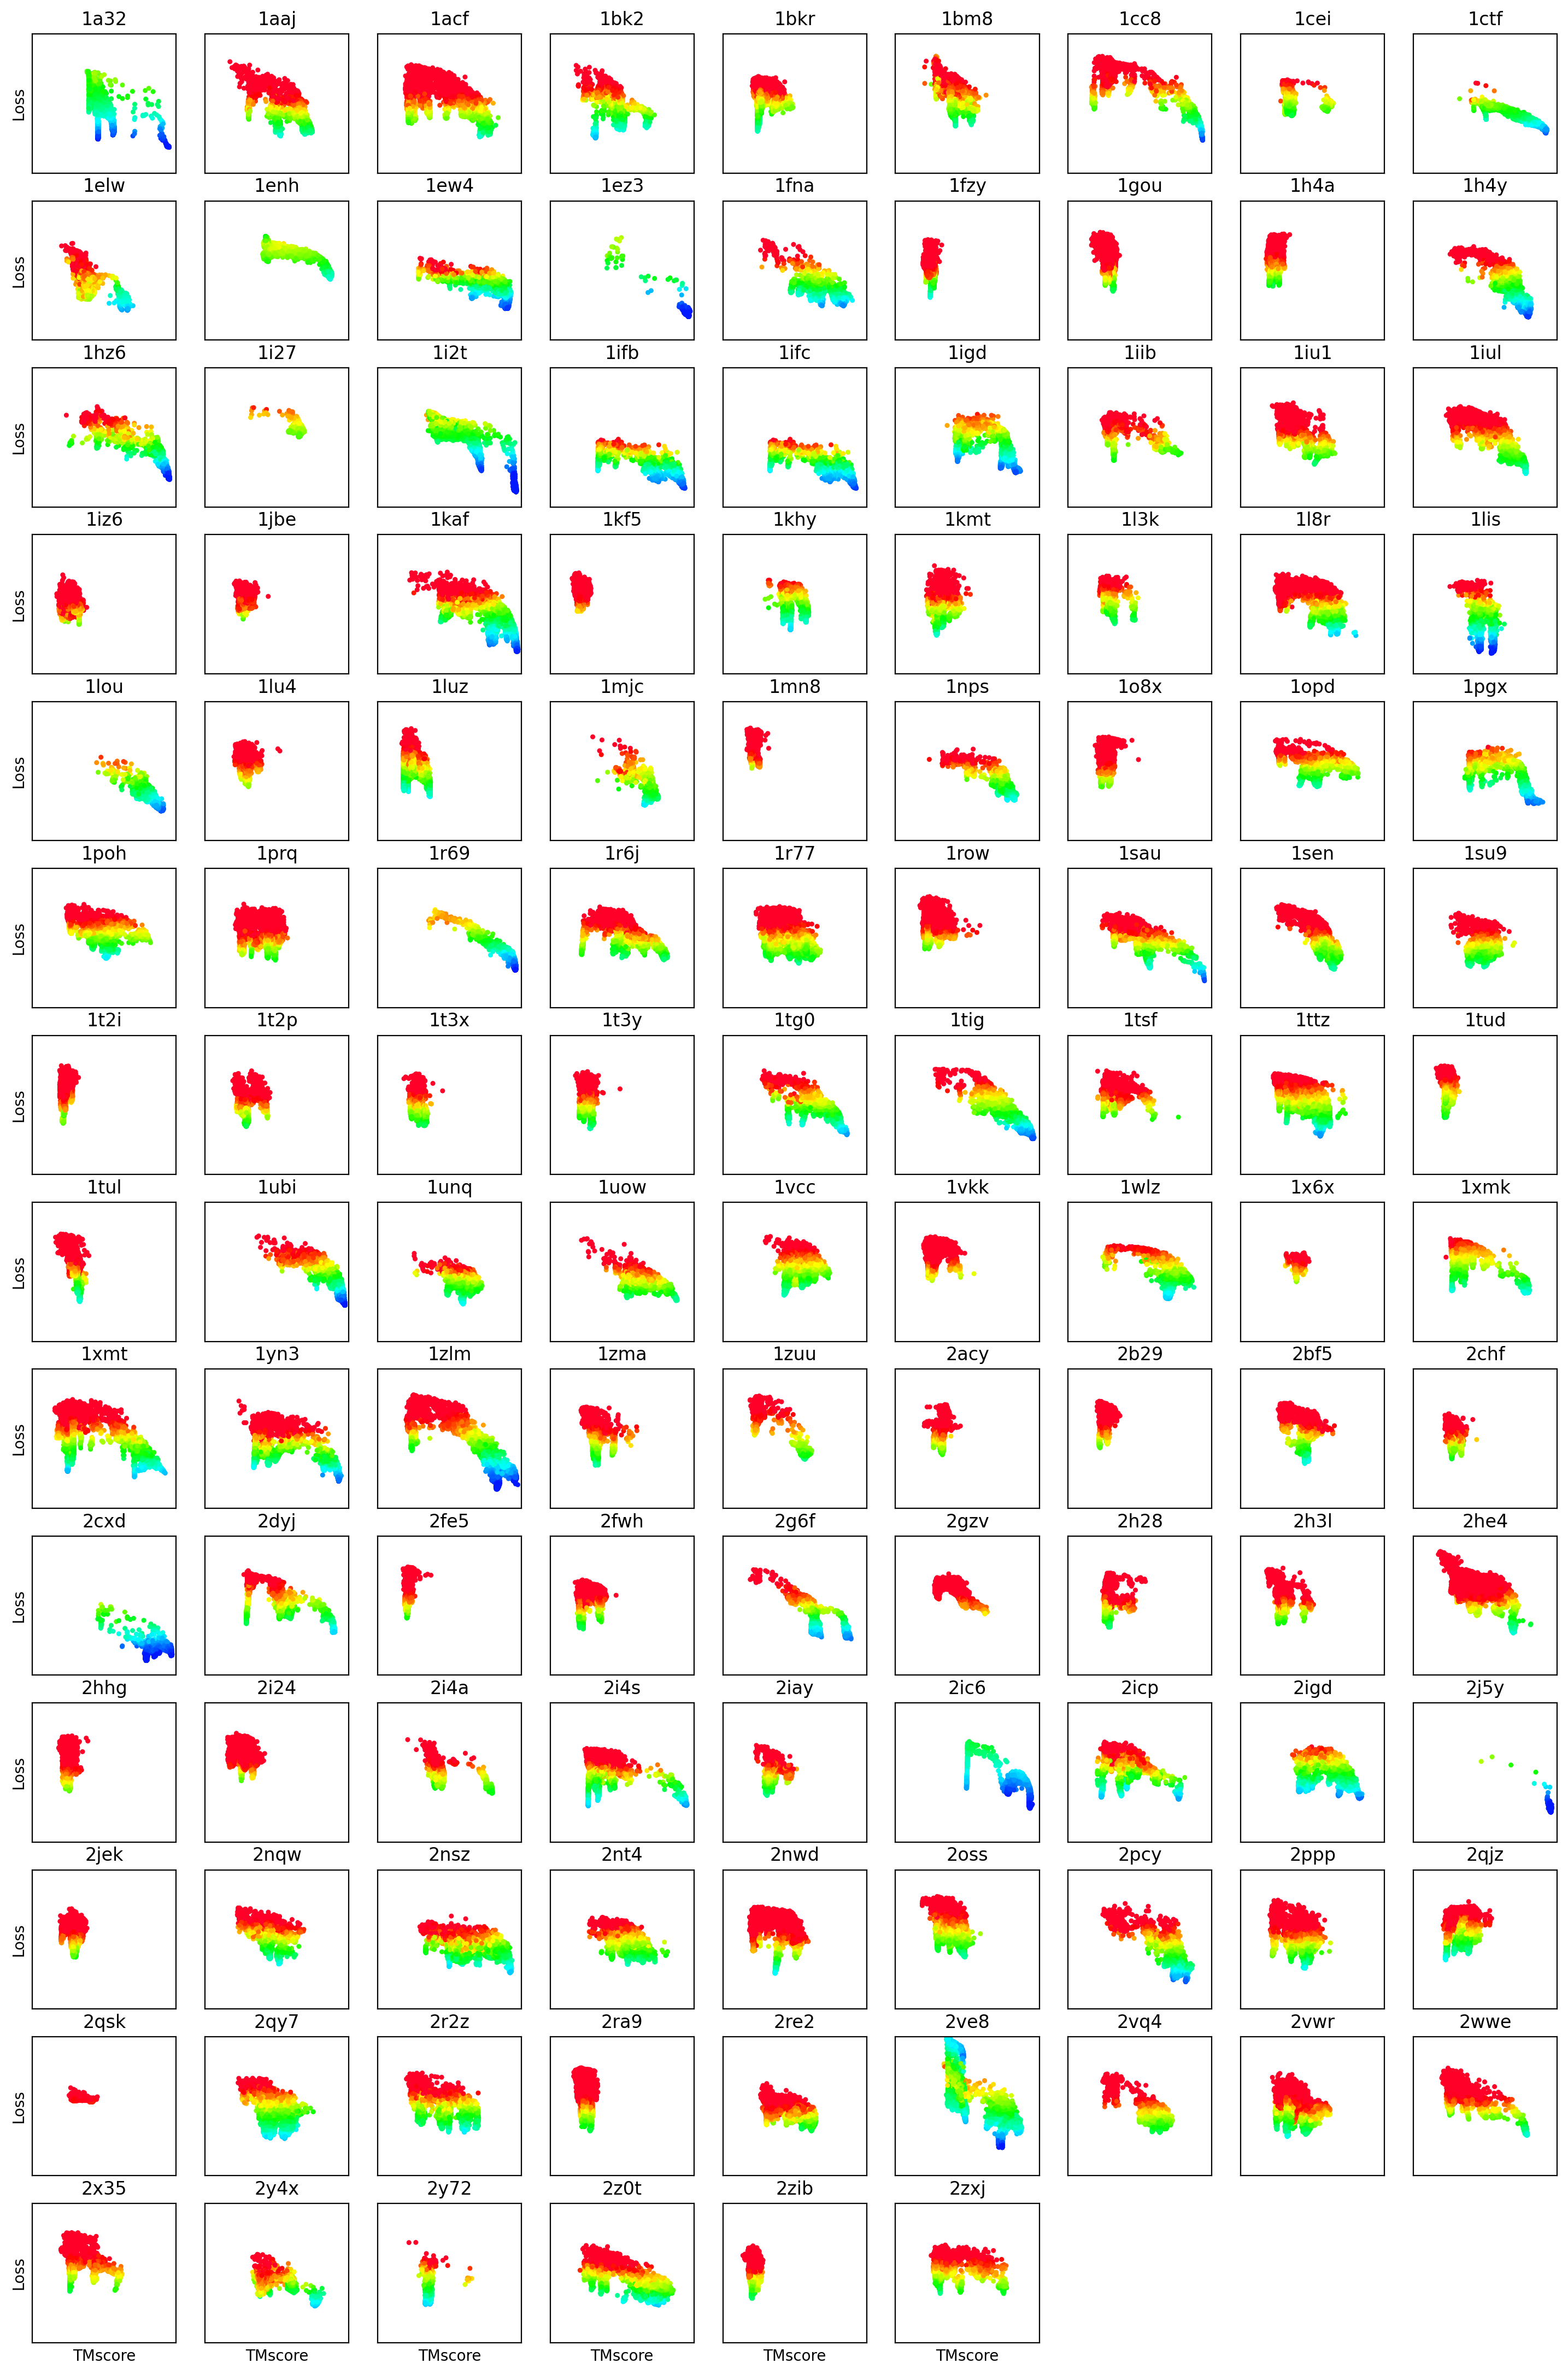

In [ ]:
data_temp_sg = get_data("template_dgram_gapseq", "template_semigreedy", plot_me=True)

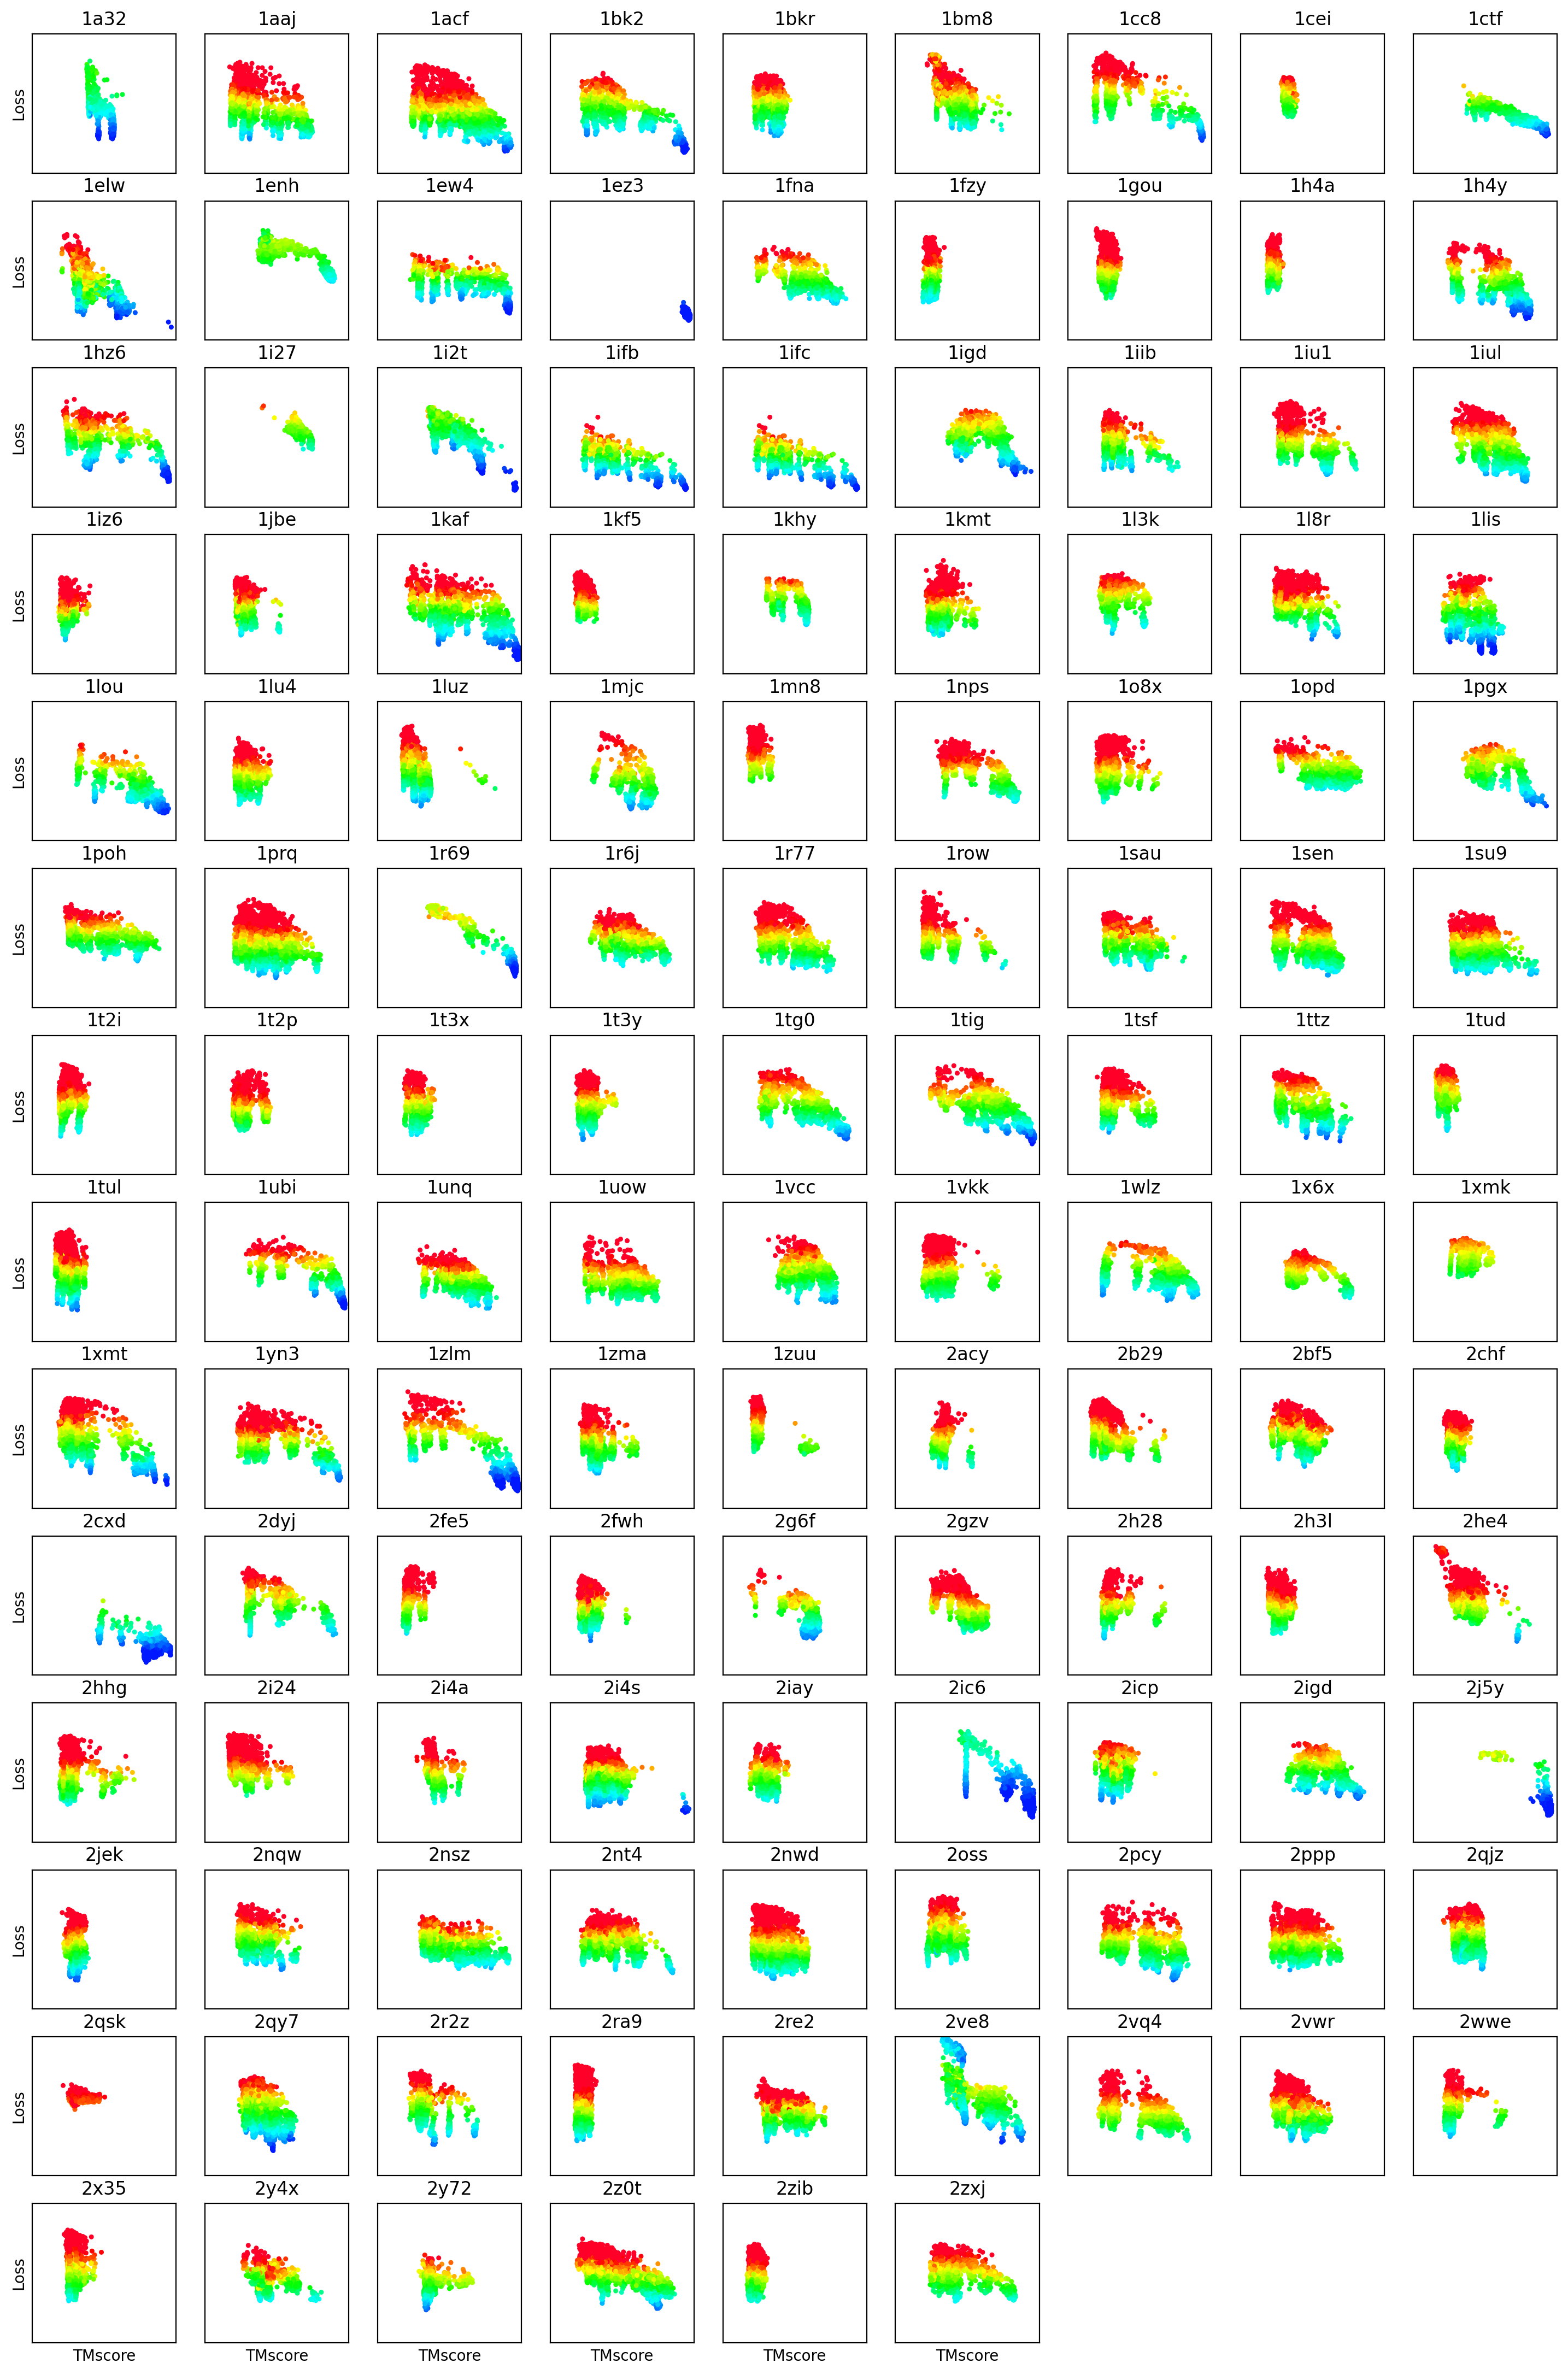

In [ ]:
data_temp_gd = get_data("template_dgram_gapseq", "template_gd", plot_me=True)

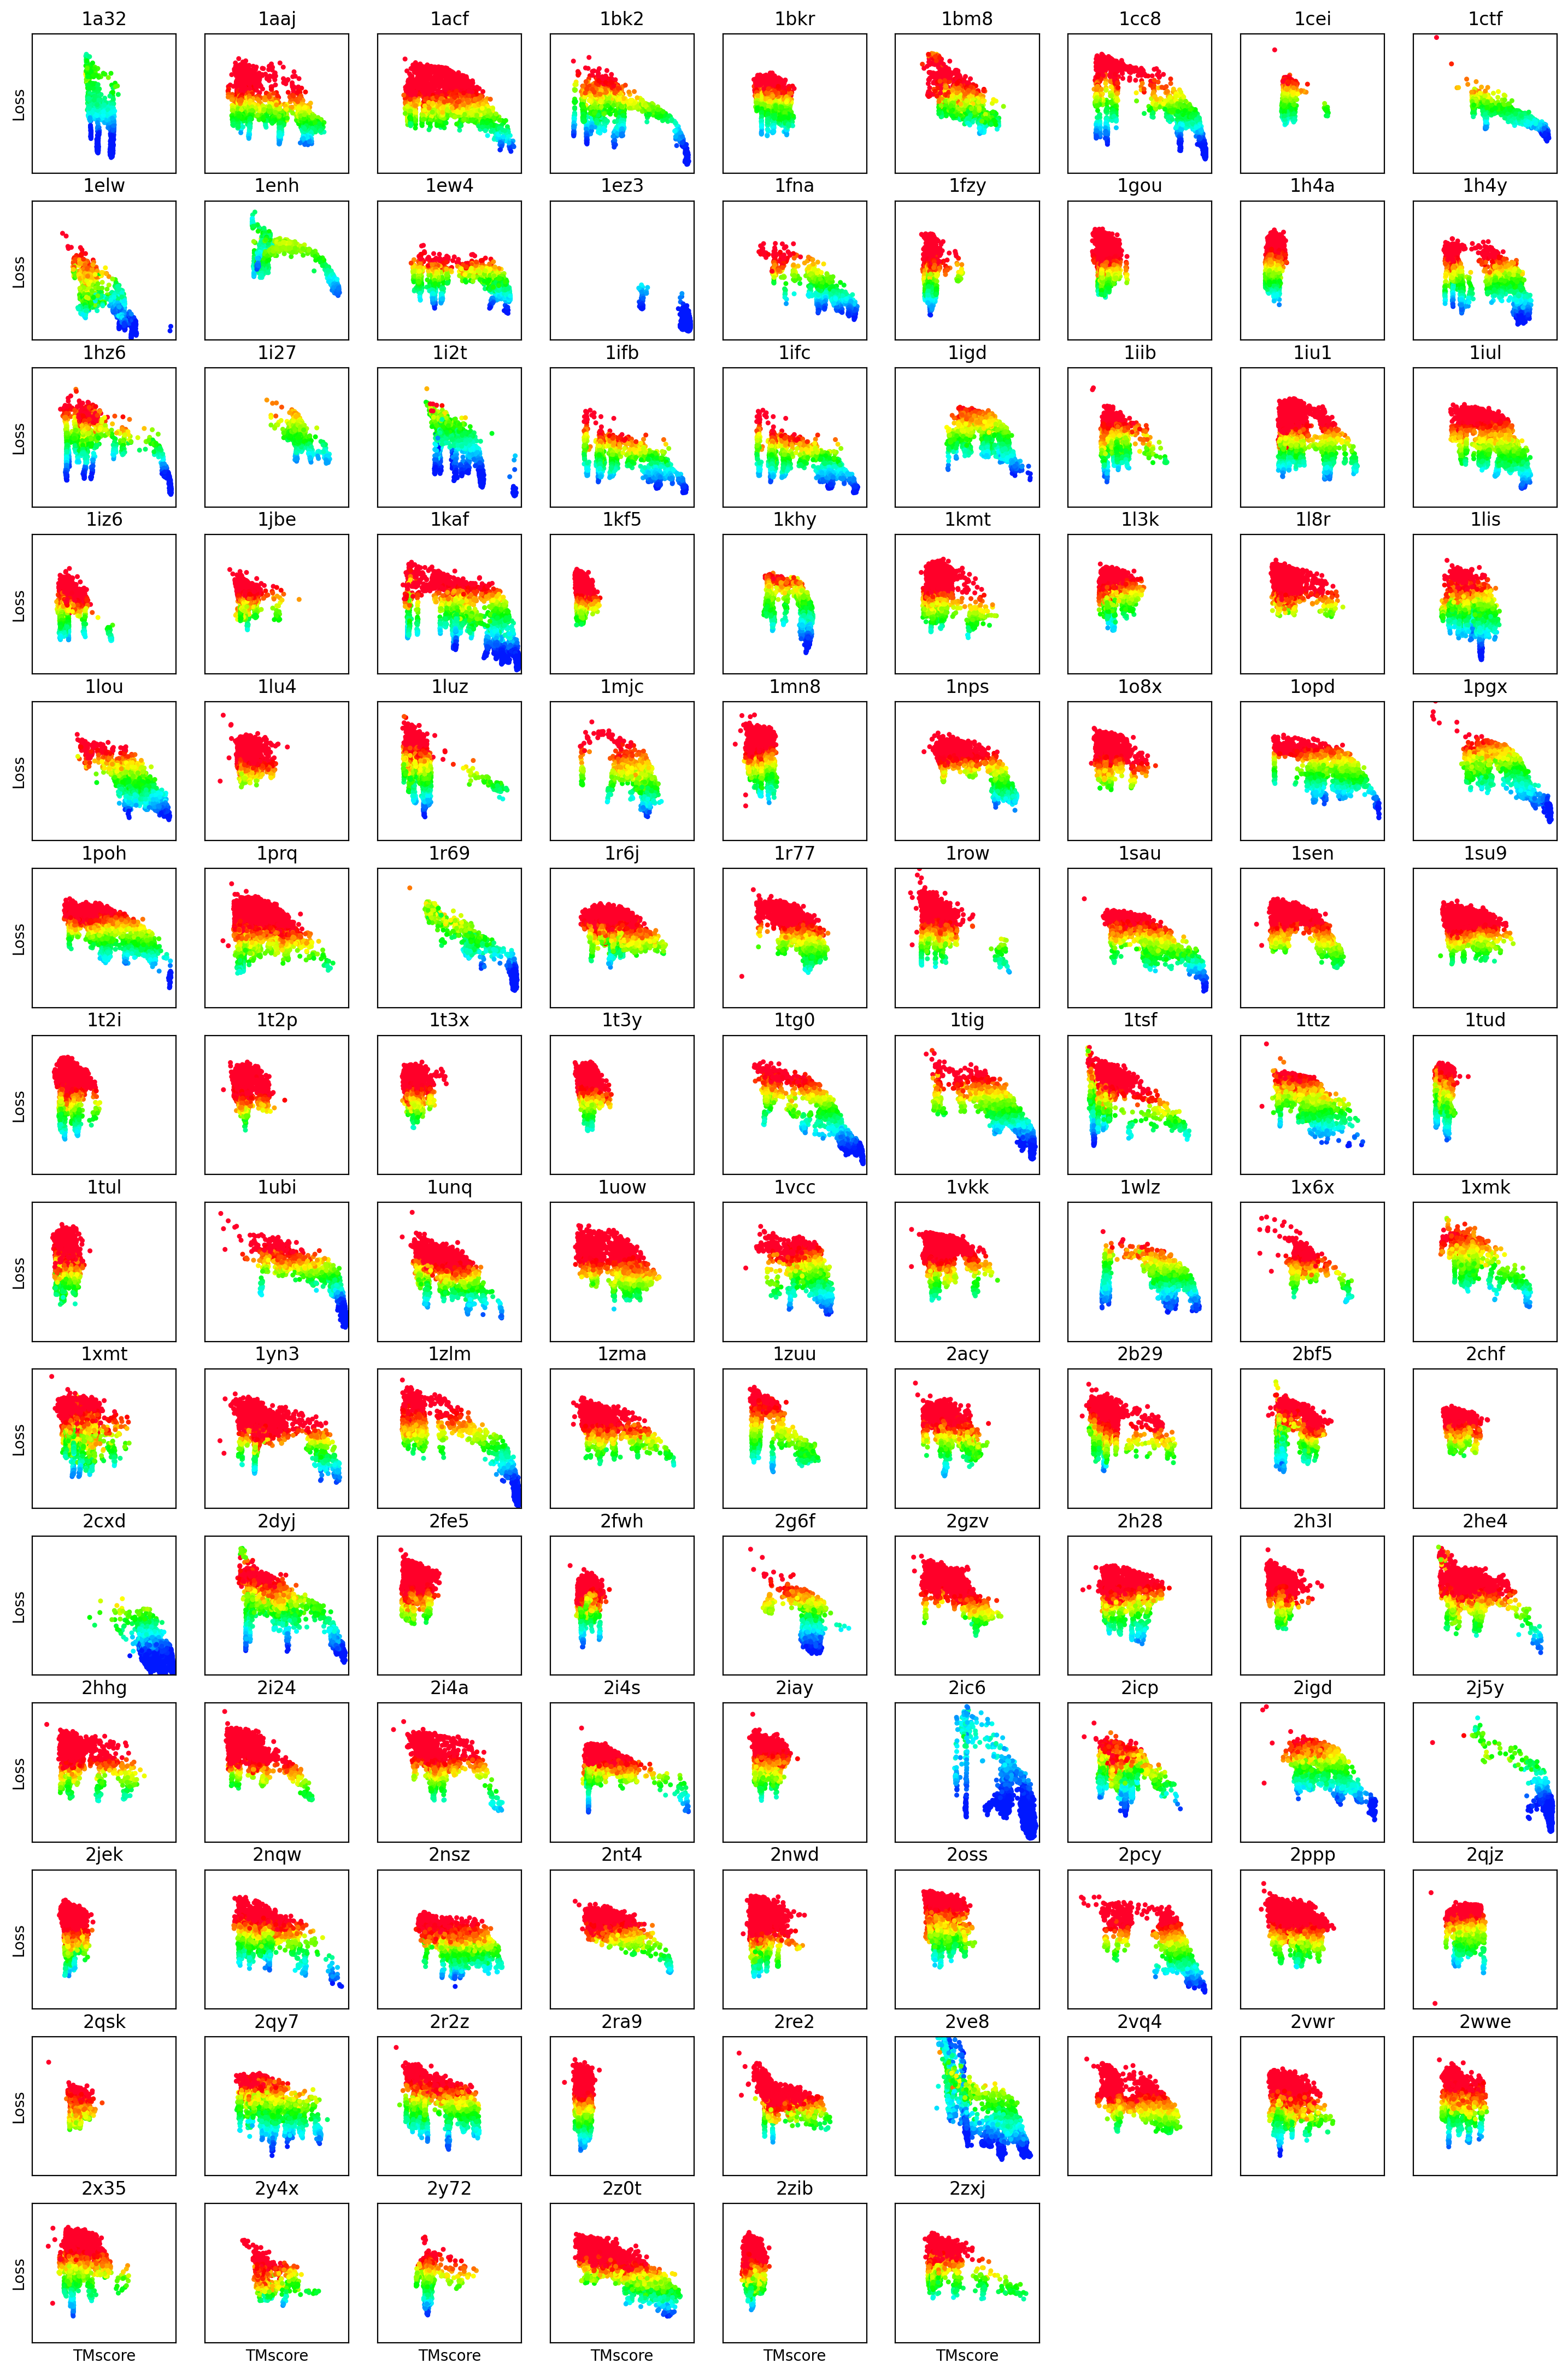

In [ ]:
data_recyc_sg = get_data("recycle_pair_dgram_fullsample_tied", "recycle_gd", plot_me=True)

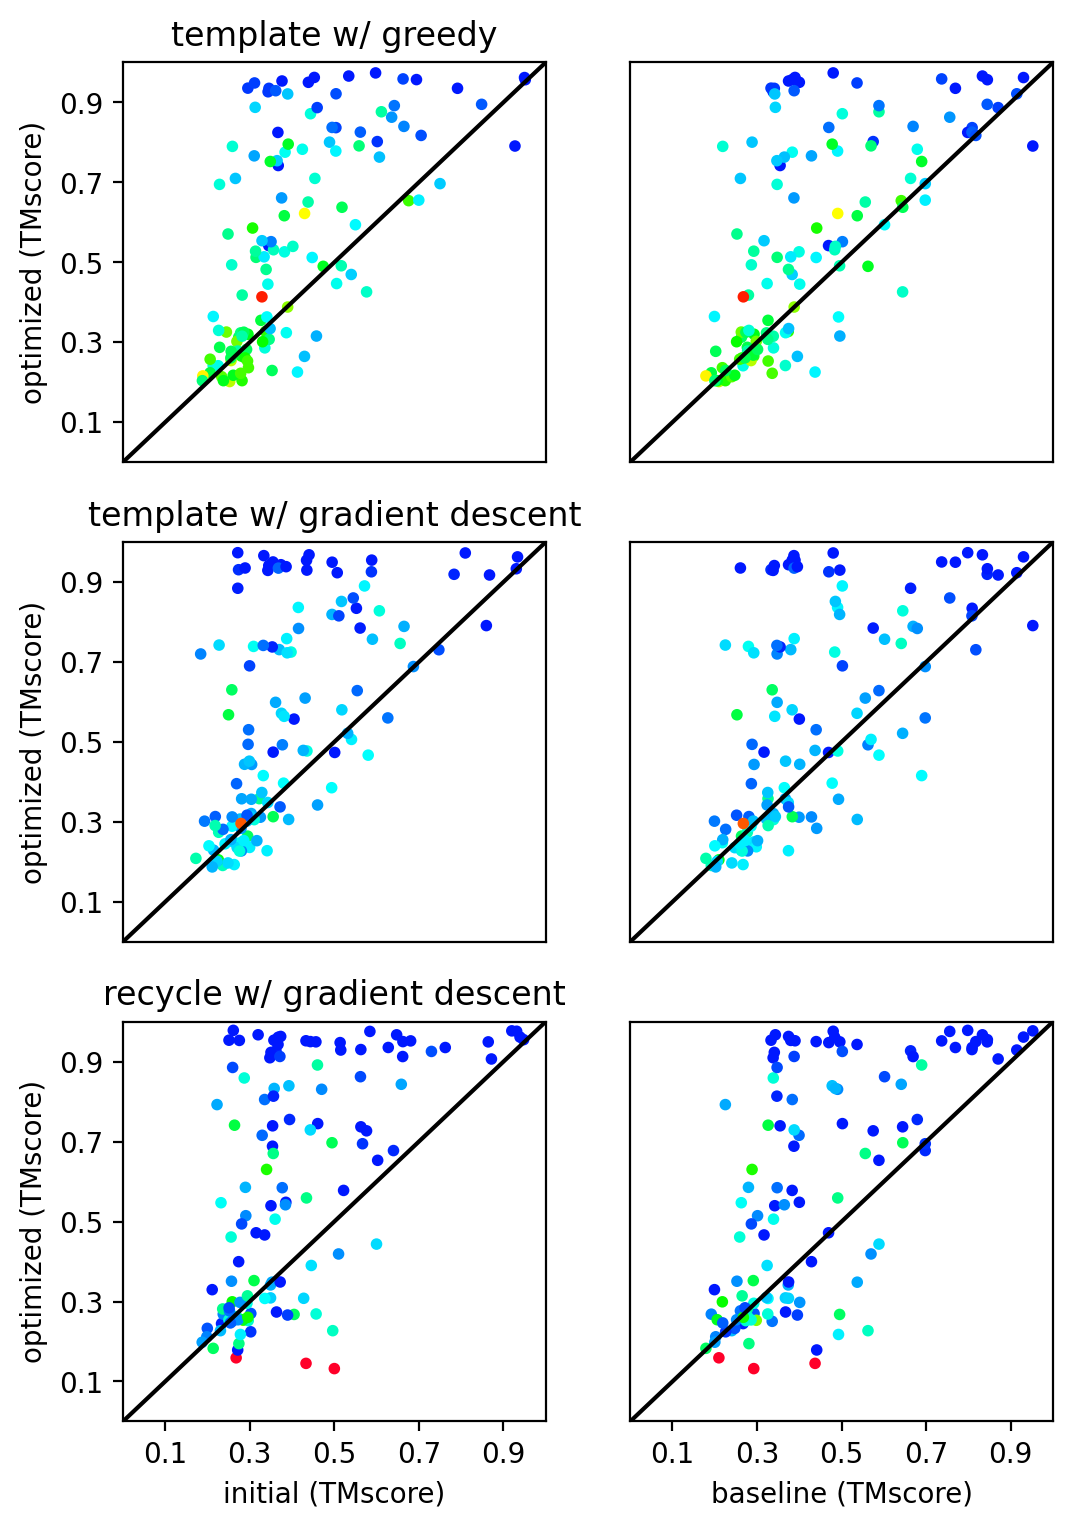

In [ ]:
plt.figure(figsize=(3*2,3*3), dpi=200)
k = 1
for n,(d,t) in enumerate(zip([data_temp_sg,data_temp_gd,data_recyc_sg],["template w/ greedy","template w/ gradient descent","recycle w/ gradient descent"])):
  if d is not None:
    data = np.asarray(d)    
    c = rescale(data[:,2],0.5,0.9)
    for m,(p,l) in enumerate(zip([0,-1],["init","baseline"])):
      plt.subplot(3,2,k)
      plt.scatter(data[:,p],data[:,1],c=c*0.75,vmin=0,vmax=1,cmap="gist_rainbow",s=10, rasterized=True)
      plt.plot([0,1],[0,1],color="black")
      plt.xlim(0,1); plt.ylim(0,1)
      if m == 0:
        plt.title(t)
        plt.yticks([0.1,0.3,0.5,0.7,0.9],[0.1,0.3,0.5,0.7,0.9])
        plt.ylabel("optimized (TMscore)")        
      else:
        plt.yticks([])
      if n == 2:
        plt.xticks([0.1,0.3,0.5,0.7,0.9],[0.1,0.3,0.5,0.7,0.9])
        if m == 0:
          plt.xlabel("initial (TMscore)")        
        else:
          plt.xlabel("baseline (TMscore)")
      else:
        plt.xticks([])        
      k += 1
plt.savefig("FIG_4D_S7.pdf",bbox_inches='tight',pad_inches=0, dpi=200)
plt.show()